# Outlet Store Sales Predictions
## Import Data

In [1]:
#DF, Pandas, Numpy
df_sales = 'C:/Users/Mikey.Windows/Documents/GitHub/Prediction-of-Product-Sales/Data/sales_predictions.xlsx'
import pandas as pd
import numpy as np
df = pd.read_excel(df_sales)

##Loading Data

In [2]:
#View Columns
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

## How many rows and columns?



In [4]:
#Display info for Rows and Columns
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## What are the datatypes of each variable?



In [5]:
#Data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Are there duplicates? If so, drop any duplicates.

In [6]:
# Any Duplicates?
df.duplicated().sum()

0

## Identify missing values.

In [7]:
#Missing values list.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.shape

(8523, 12)

## Decide on how to address the missing values.
## **Item_Weight Missing Values**
### Justification
#### We will use mean to impute the following data. It should closely represnt accurate info here.

In [9]:
#Now we will replace any blank fields with our mean.
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

## **Outlet_Size Missing Values**
### Justification
#### We will use mode here to impute data. This will average over the data and fill info as needed. Based on Outlet_Size



In [10]:
#Use mode because categorical data.
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)
df['Outlet_Size'].replace('High','Large',inplace=True)

# Confirm that there are no missing values after addressing them.

In [11]:
#Checking missing values are replaced.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Find and fix any inconsistent categories of data

In [12]:
#Use .value_counts() to find issues.
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
#Use replace to fix typos and clean up data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [14]:
#Check if changes made.
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

For any numerical columns, obtain the summary statistics of each

In [15]:
#Use df.describe()
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



##### Histogram to view the distributions of various features in your dataset.
##### Boxplot to view statistical summaries of various features in your dataset.
##### Heatmap of the correlation between features.

In [16]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Display data for ease of access.
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


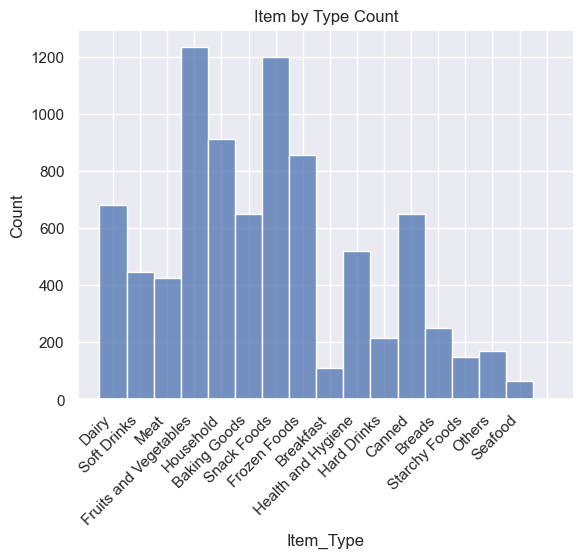

In [18]:
#Histogram 1.
sns.set(style='darkgrid')
ax=sns.histplot(df['Item_Type'])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Item by Type Count');

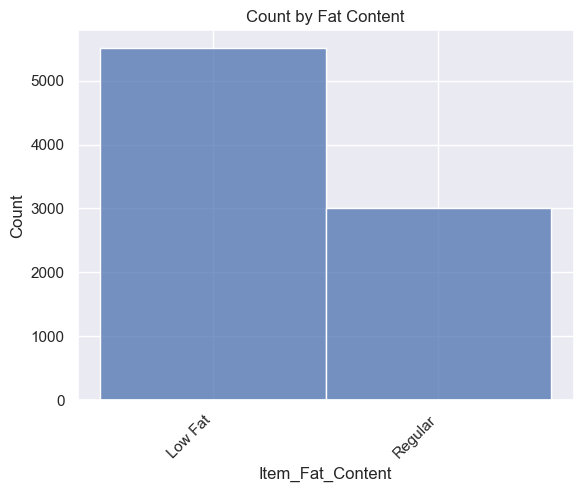

In [19]:
#Histogram 2.
sns.set(style='darkgrid')
ax=sns.histplot(df['Item_Fat_Content'])
ax.set_xticks([0,1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Count by Fat Content');

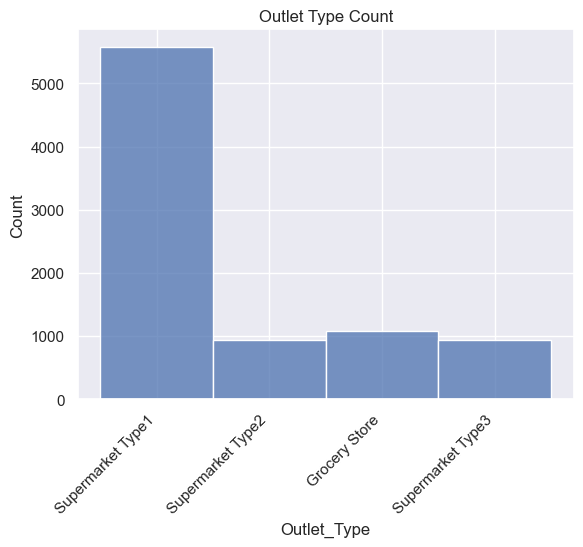

In [20]:
#Histogram 3.
sns.set(style='darkgrid')
ax=sns.histplot(df['Outlet_Type'])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Outlet Type Count');

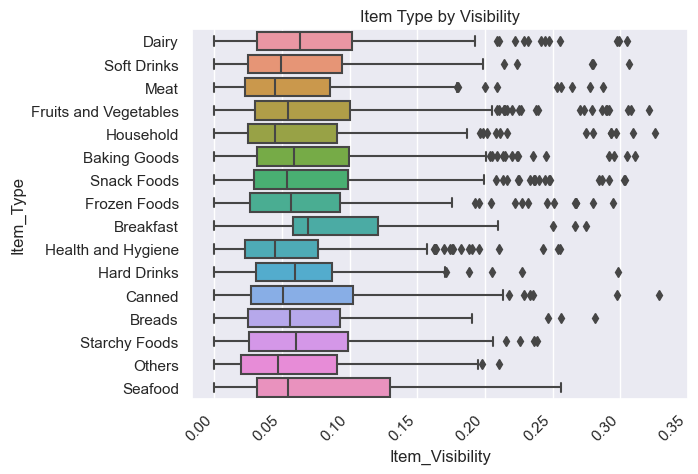

In [21]:
#Boxplot 1.
sns.set(style='darkgrid')
plt.tight_layout()
ax=sns.boxplot(data=df, y=df['Item_Type'],x=df['Item_Visibility'])
ax.set_xticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title('Item Type by Visibility');

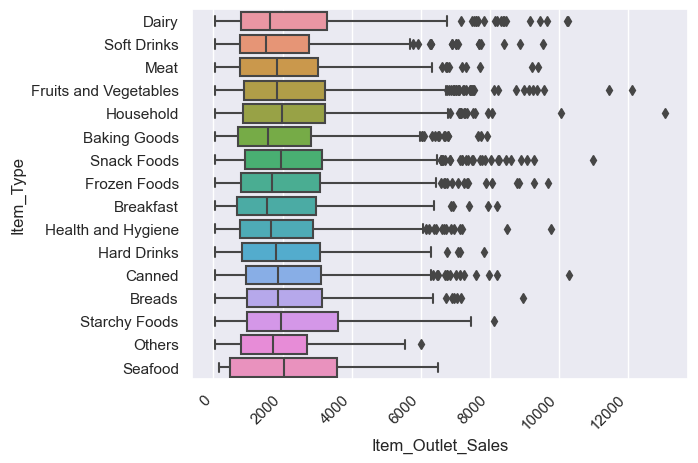

In [22]:
#Boxplot 2.
sns.set(style='darkgrid')
plt.tight_layout()
ax=sns.boxplot(data=df, y=df['Item_Type'],x=df['Item_Outlet_Sales'])
ax.set_xticks([0,2000,4000,6000,8000,10000,12000])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

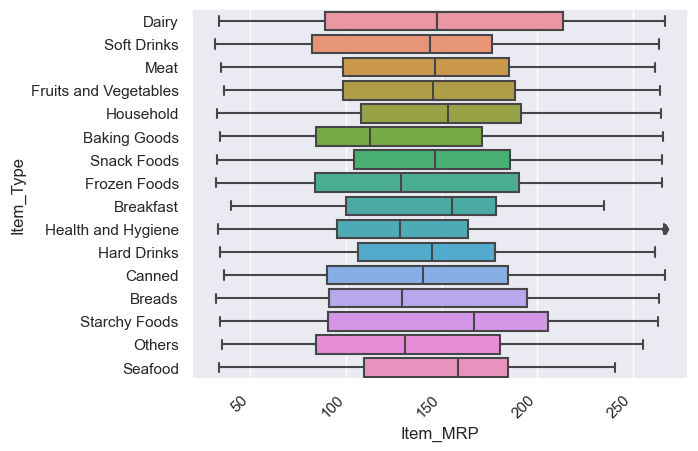

In [23]:
#Boxplot 3.
sns.set(style='darkgrid')
ax=sns.boxplot(data=df, y=df['Item_Type'],x=df['Item_MRP'])
ax.set_xticks([50,100,150,200,250])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

In [24]:
#Correlate
corr=df.corr();
corr

C:\Users\Mikey.Windows\AppData\Local\Temp\ipykernel_15572\405463462.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr();


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


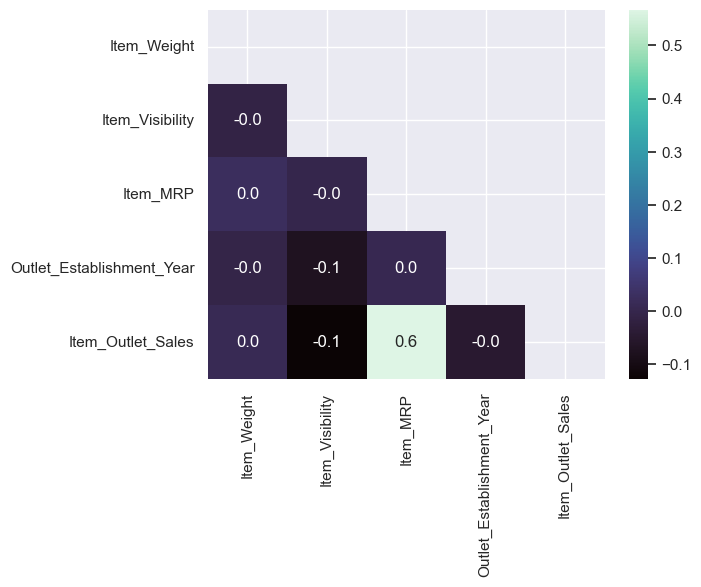

In [25]:
#Define fig and ax objects
plt.tight_layout()
#Creating our heatmap with some args to display in an easy to read manner.
mask=np.triu(np.ones_like(corr))
ax=sns.heatmap(corr,cmap='mako',annot=True,fmt = '.1f',mask=mask);

In [26]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

# Possible Questions to Answer:

1.   What outlet type sells the most?
2.   What item type has the highest sales?



## This visualization shows that Supermarket Type3 has the highest mean of sales.

In [27]:
#Groupby and calculate mean of Sales.
salesbytype=df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index(name='Mean Sales')
salesbytype.head()

,Outlet_Type,Mean Sales
0,Grocery Store,339.828500
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Supermarket Type3,3694.038558


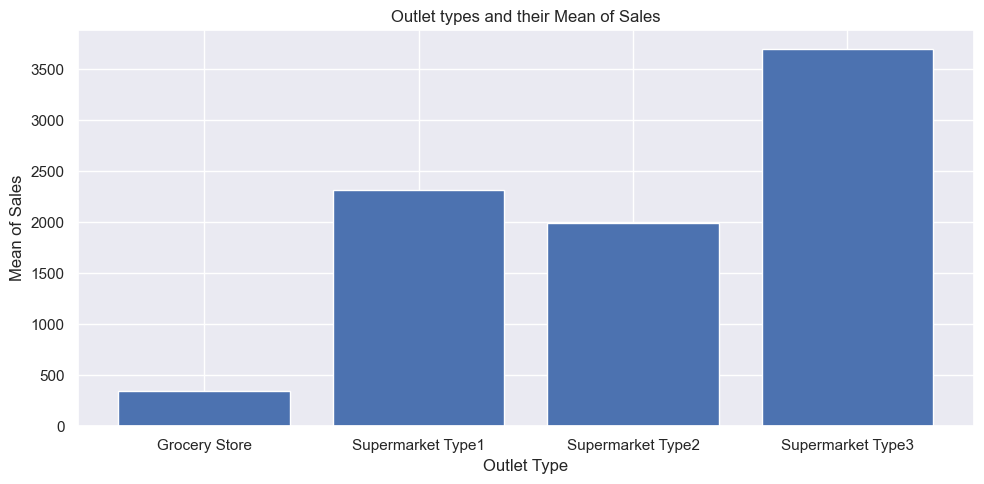

In [28]:
#Simple Barplot
plt.figure(figsize = (10,5))
plt.bar(salesbytype['Outlet_Type'],salesbytype['Mean Sales'])
plt.xlabel('Outlet Type')
plt.ylabel('Mean of Sales')
plt.title('Outlet types and their Mean of Sales')
plt.tight_layout()

## Below shows us that Starchy foods have the highest average sales.

In [29]:
#Using mean of sales, to determine the highest average sales. The filter below will help with this.
itemtyp=df.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index(name='Mean_Sales')
itemtyp.head()
orderpl2 = itemtyp.sort_values(by='Mean_Sales',ascending=False).Item_Type.values

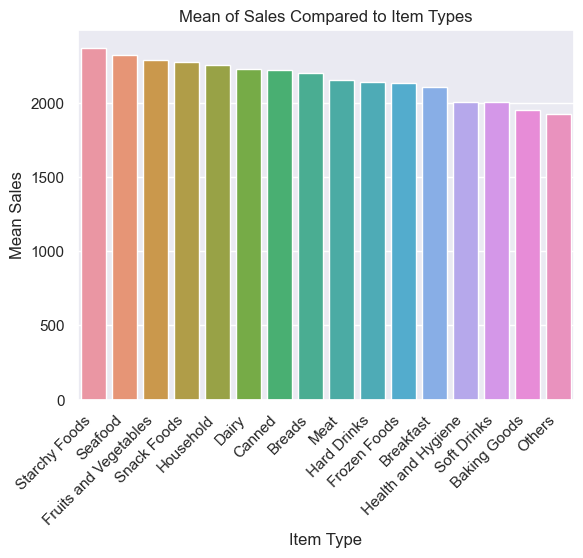

In [30]:
#Another Barplot.
orderpl2 = itemtyp.sort_values(by='Mean_Sales',ascending=False).Item_Type.values
ax=sns.barplot(x='Item_Type',y='Mean_Sales',data=itemtyp,order=orderpl2)
ax.set_xlabel('Item Type')
ax.set_ylabel('Mean Sales')
ax.set_title('Mean of Sales Compared to Item Types')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

# Pre-Processing for machine learning.

#### The following codes are from LP

In [31]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [32]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

In [33]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [34]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [35]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [36]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [37]:
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.dummy import DummyRegressor
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
dfmachine='C:/Users/Mikey.Windows/Documents/GitHub/Prediction-of-Product-Sales/Data/sales_predictions.xlsx'
df2 = pd.read_excel(dfmachine)

In [39]:
#Fixing missing/typos.
df2['Outlet_Size'].replace('High','Large',inplace=True)
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('LF', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('low fat', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('reg', 'Regular')

In [40]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [41]:
#Dropping columns that are unnecessary.
df2.drop(columns=['Item_Identifier'],inplace=True);

In [42]:
# Split X should only include the Manufacturer, cereal type, grams of fat, grams of sugars, and weight in ounces columns.
X=df2.drop(['Item_Outlet_Sales'],axis=1)
y=df2['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [43]:
cat_sel=make_column_selector(dtype_include='object')
cat_sel(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [44]:
num_sel=make_column_selector(dtype_include='number')
num_sel(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [45]:
cat_pipe=make_pipeline(SimpleImputer(strategy='constant',fill_value='MISSING'),
                      OneHotEncoder(drop='first', sparse=False))
num_pipe=make_pipeline(SimpleImputer(strategy='mean'))

In [46]:
preprocessor=make_column_transformer((num_pipe,num_sel),
                                    (cat_pipe,cat_sel),
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D13453A00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D134DFD30>)],
                  verbose_feature_names_out=False)

In [47]:
preprocessor.fit(X_train)
feature_names=preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_MISSING', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_

In [48]:
X_train_df=pd.DataFrame(preprocessor.transform(X_train),
                       columns=feature_names,index=X_train.index)
X_train_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,16.35,0.029565,256.4646,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7510,15.25,0.000000,179.7660,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5828,12.35,0.158716,157.2946,1999.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
X_test_df=pd.DataFrame(preprocessor.transform(X_test),
                      columns=feature_names,index=X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.30,0.026300,79.4302,1987.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2957,7.93,0.071136,42.7086,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7031,14.50,0.041313,42.0454,1999.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
y_test.head(3)

7503    1743.0644
2957     356.8688
7031     377.5086
Name: Item_Outlet_Sales, dtype: float64

# Linear Regression

In [51]:
linreg=LinearRegression()
linreg.fit(X_train_df,y_train)
evaluate_regression(linreg,X_train_df,y_train,X_test_df,y_test)

Training Data:	R^2= 0.56	RMSE= 1139.10
Test Data:	R^2= 0.57	RMSE= 1092.86


In [52]:
linreg.coef_

array([  -1.94181707, -423.39017971,   15.72092418,  -10.74046984,
         62.6252336 ,  -28.64831812,   45.36106369,   27.51619423,
       -106.33501436,   -1.7706262 ,   45.7540295 ,   13.89489912,
         27.02541373,    5.50974637,  -11.86488664,  -26.81372575,
        327.50113616,  -21.93239257,  -39.48573523,   42.08886467,
        232.81837736,  436.84498243,  182.12508475, -642.01571839,
        907.23913042,  -16.00005806,  241.59423372,  424.25963679,
       -382.93168631, -705.49476657,  706.43252886, -233.75613966,
        662.43915809,  -61.75139018,  936.58548593,  182.12508475,
        907.23913042])

In [53]:
print(len(linreg.coef_))
len(feature_names)

37


37

In [54]:
coeffs=pd.Series(linreg.coef_,index=feature_names)
coeffs

Item_Weight                         -1.941817
Item_Visibility                   -423.390180
Item_MRP                            15.720924
Outlet_Establishment_Year          -10.740470
Item_Fat_Content_Regular            62.625234
Item_Type_Breads                   -28.648318
Item_Type_Breakfast                 45.361064
Item_Type_Canned                    27.516194
Item_Type_Dairy                   -106.335014
Item_Type_Frozen Foods              -1.770626
Item_Type_Fruits and Vegetables     45.754029
Item_Type_Hard Drinks               13.894899
Item_Type_Health and Hygiene        27.025414
Item_Type_Household                  5.509746
Item_Type_Meat                     -11.864887
Item_Type_Others                   -26.813726
Item_Type_Seafood                  327.501136
Item_Type_Snack Foods              -21.932393
Item_Type_Soft Drinks              -39.485735
Item_Type_Starchy Foods             42.088865
Outlet_Identifier_OUT013           232.818377
Outlet_Identifier_OUT017          

In [55]:
coeffs.loc['intercept']=linreg.intercept_
coeffs

Item_Weight                           -1.941817
Item_Visibility                     -423.390180
Item_MRP                              15.720924
Outlet_Establishment_Year            -10.740470
Item_Fat_Content_Regular              62.625234
Item_Type_Breads                     -28.648318
Item_Type_Breakfast                   45.361064
Item_Type_Canned                      27.516194
Item_Type_Dairy                     -106.335014
Item_Type_Frozen Foods                -1.770626
Item_Type_Fruits and Vegetables       45.754029
Item_Type_Hard Drinks                 13.894899
Item_Type_Health and Hygiene          27.025414
Item_Type_Household                    5.509746
Item_Type_Meat                       -11.864887
Item_Type_Others                     -26.813726
Item_Type_Seafood                    327.501136
Item_Type_Snack Foods                -21.932393
Item_Type_Soft Drinks                -39.485735
Item_Type_Starchy Foods               42.088865
Outlet_Identifier_OUT013             232

In [56]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs

Item_Weight                           -1.94
Item_Visibility                     -423.39
Item_MRP                              15.72
Outlet_Establishment_Year            -10.74
Item_Fat_Content_Regular              62.63
Item_Type_Breads                     -28.65
Item_Type_Breakfast                   45.36
Item_Type_Canned                      27.52
Item_Type_Dairy                     -106.34
Item_Type_Frozen Foods                -1.77
Item_Type_Fruits and Vegetables       45.75
Item_Type_Hard Drinks                 13.89
Item_Type_Health and Hygiene          27.03
Item_Type_Household                    5.51
Item_Type_Meat                       -11.86
Item_Type_Others                     -26.81
Item_Type_Seafood                    327.50
Item_Type_Snack Foods                -21.93
Item_Type_Soft Drinks                -39.49
Item_Type_Starchy Foods               42.09
Outlet_Identifier_OUT013             232.82
Outlet_Identifier_OUT017             436.84
Outlet_Identifier_OUT018        

In [57]:
df.select_dtypes('object').nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [58]:
cat_sel(X)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [59]:
for col in cat_sel(X):
    print(f"For {col}:\n{X[col].unique()}\n")

For Item_Fat_Content:
['Low Fat' 'Regular']

For Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

For Outlet_Identifier:
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

For Outlet_Size:
['Medium' nan 'Large' 'Small']

For Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']

For Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [60]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [61]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [62]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [63]:
drop_cat=['Low Fat','Others', 'OUT019', 'MISSING', 'Tier 1', 'Supermarket Type2']

In [64]:
cat_pipe=make_pipeline(SimpleImputer(strategy='constant',fill_value='MISSING'),
                      OneHotEncoder(drop=drop_cat, sparse=False))
num_pipe=make_pipeline(SimpleImputer(strategy='mean'))

In [65]:
preprocessor=make_column_transformer((num_pipe,num_sel),
                                    (cat_pipe,cat_sel),
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D13453A00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop=['Low Fat',
                                                                      'Others',
                                                                      'OUT019',
                                                                      'MISSING',
                                                                      'Tier 1',
                                                                      'Supermarket '
                                                                      'Type2'],
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D134DFD30>)],
                  verbose_feature_names_out=False)

In [66]:
preprocessor.fit(X_train)
feature_names=preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Large', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_

In [67]:
X_train_df2=pd.DataFrame(preprocessor.transform(X_train),
                       columns=feature_names,index=X_train.index)
X_train_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,16.35,0.03,256.46,"2,009.00",0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
7510,15.25,0.00,179.77,"2,009.00",1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
5828,12.35,0.16,157.29,"1,999.00",1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00


In [68]:
X_test_df2=pd.DataFrame(preprocessor.transform(X_test),
                      columns=feature_names,index=X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.30,0.03,79.43,"1,987.00",0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
2957,7.93,0.07,42.71,"1,997.00",0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
7031,14.50,0.04,42.05,"1,999.00",1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00


Training Data:	R^2= 0.56	RMSE= 1139.10
Test Data:	R^2= 0.57	RMSE= 1092.86


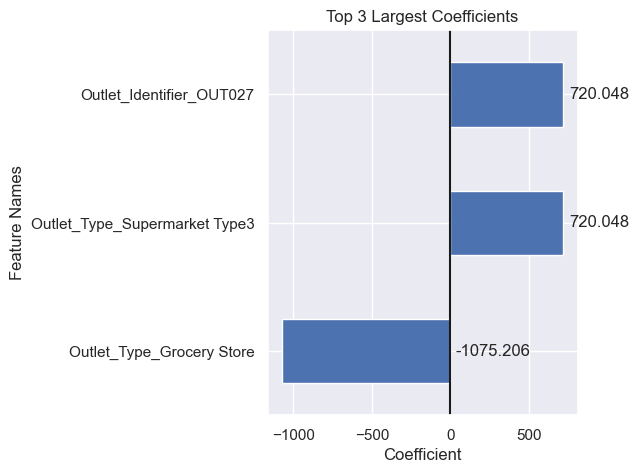

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_df2,y_train)
evaluate_regression(lin_reg, X_train_df2, y_train, X_test_df2,y_test)
coeffs = get_coeffs_linreg(lin_reg)
plot_coeffs(coeffs,top_n=3,annotate=True)
plt.savefig('coefficients.png', bbox_inches='tight');

In [70]:
# 3 Most impactful features
top3=coeffs.abs().nlargest(3).index

In [71]:
# interpret them in plain english.
for feature in top3:
        coefficient=coeffs[feature]
        if coefficient >= 0:
            print(f'This Feature {feature} has a positive impact on the target variable.')
        else:
            print(f'This Feature {feature} has a negative impact on the target variable.')

This Feature intercept has a positive impact on the target variable.
This Feature Outlet_Type_Grocery Store has a negative impact on the target variable.
This Feature Outlet_Identifier_OUT027 has a positive impact on the target variable.


# Random Forest

Training Data:	R^2= 0.94	RMSE= 433.17
Test Data:	R^2= 0.55	RMSE= 1112.48


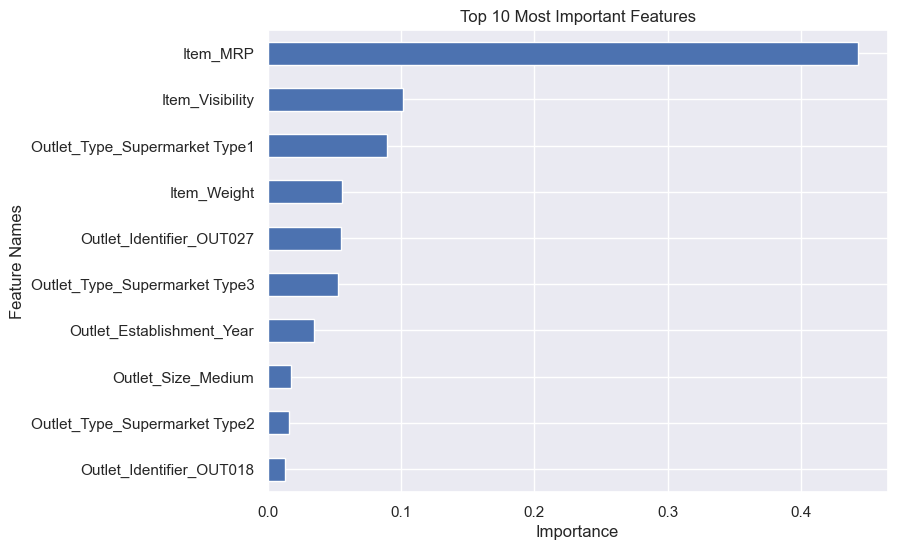

In [72]:
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10);
plt.savefig('importances.png', bbox_inches='tight');

## Interpretation of your feature importances

* Item_MRP, is the most important feature, It represents the maximum price the product can be sold to the customer.
* Item_Visibility, Items viewability in the store greatly impacts sales.
* Outlet Type, Shows that different outlet types have higher sales counts.

# JobLib

In [73]:
import joblib
export = {'preprocessor':preprocessor,
         'X_train':X_train_df2,
         'y_train': y_train,
         'X_test':X_test_df2,
         'y_test': y_test,
         'LinearRegression':lin_reg}
joblib.dump(export, 'linreg.joblib')

['linreg.joblib']

In [74]:
export = {'preprocessor':preprocessor,
         'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
         'y_test': y_test,
         'RandomForest':reg}
joblib.dump(export, 'rfreg.joblib')

['rfreg.joblib']